# Machine Learning. Practice 1
Andres Carrillo Moreno

## Diamonds price 
In this first assingment I am going to analyse the price of the diamonds. In order to do so, I will check the "Diamonds" database to see  which are the main elements that influence the price of a diamond. in addition, I will try to predict the price of one random Diamond based on the differents elementes that made our database

#### Description of the dataset and it main variables
This dataset comes from Kaggle and it is known as "Diamonds" and the variables mean the following:

*  *Carat :* Carat weight of the Diamond.
*  *Cut :* It describes how good the diamond got cut
*  *Colour :* The colour of the diamond
*  *Clarity :* It refers to the diamond clarity
*  *Depth :* It referes to the height of the diamond, measured from the culet to the table, divided by its average girdle diameter
*  *Table :* It refers to the width of the diamond's table expressed as a percentage of its average diameter
*  *Price :* The price of the diamond
*  *X :* Length of the diamond in mm
*  *Y :* Width of the diamond in mm
*  *Z :* Height of the diamond in mm

We have some cualitative (or categorical) features such as: Cut, colour or clarity and some quantitative(or numerical) features such as: carat, depth, table, price, x, y, z. I will try do predict the price of the diamond so the *target variable* will  be it.

### I will be using the next libraries in order to do the exploratory analysis of the data:

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

Now I will read the data so I can work with it:

In [7]:
data = 'Datos/Diamonds.csv'
original_data = pd.read_csv(data, index_col = 0)

Now I will use the list function so we can see how the variables are called:

In [8]:
list(original_data)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

After I saw the name of the variables I am interested in knowing what type of data they have:

In [15]:
###First of all I will take out all the possible NaNs on the dataframe with the following function:
original_data.dropna(inplace = True)

Now i can look for what type of data do these variables have, using the function data.info:

In [16]:
original_data.info()
###I can see that there are 3 categorical variables, as it has already been said, and the rest are all numeric ones.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


After seeing what kind of data is this dataframe using, I will look for the main information about them:

In [18]:
original_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


It makes no sense that the minimum size is 0, so I will clean the data that are 0 

In [19]:
clean_data = original_data[(original_data[['x','y','z']] != 0).all(axis=1)]

Now I will check if the previous formula worked or not

In [20]:
clean_data.describe()
###i can see that the minimum for X, Y, Z are no longer 0 so I can start to use then properly

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Now I will take a look at the first ten and the last ten values of our data:

In [21]:
clean_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [22]:
clean_data.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


#### Now I will be looking for the way the variables are distributed

First of all I will check how the different categorical variables are distributed followed by the numerical ones

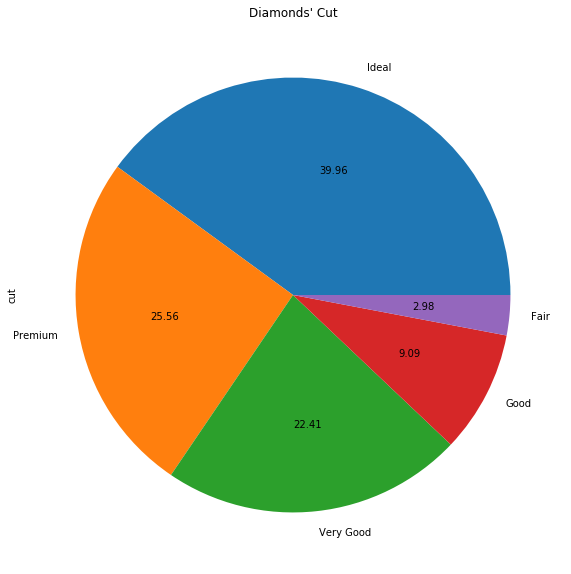

In [30]:
plot0 = clean_data['cut'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(10, 10),
                                            title="Diamonds' Cut")

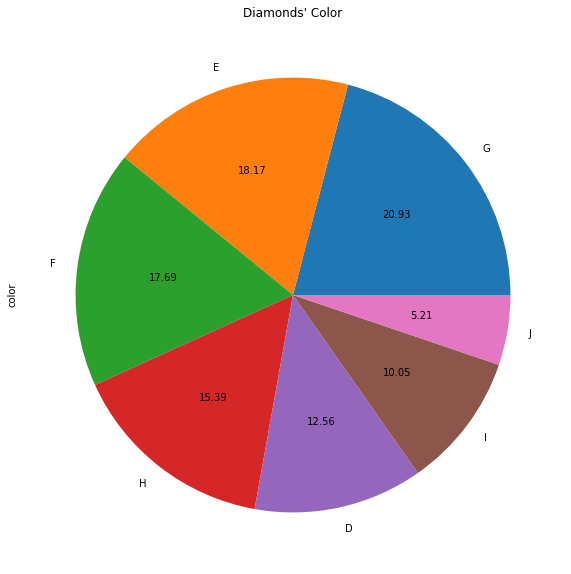

In [31]:
plot1 = clean_data['color'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(10, 10),
                                            title="Diamonds' Color")

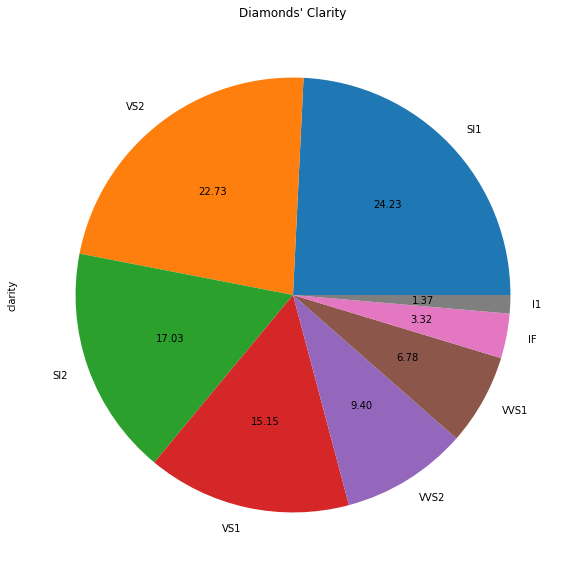

In [34]:
plot2 = clean_data['clarity'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(10, 10),
                                            title="Diamonds' Clarity")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(clean_data , color="dodgerblue", ax=axes[0], axlabel='Ideal')
sns.distplot(clean_data , color="deeppink", ax=axes[1], axlabel='Fair')
sns.distplot(clean_data , color="gold", ax=axes[2], axlabel='Good')
sns.distplot(clean_data , color="gold", ax=axes[2], axlabel='Good')
sns.distplot(clean_data , color="gold", ax=axes[2], axlabel='Good')
plt.xlim(50,75);

Text(0, 0.5, "Carats' hist")

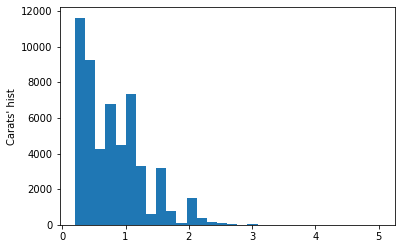

In [37]:
plt.hist(clean_data['carat'], density=False, bins=30)
plt.ylabel("Carats' hist")

In [39]:
sns.distplot?

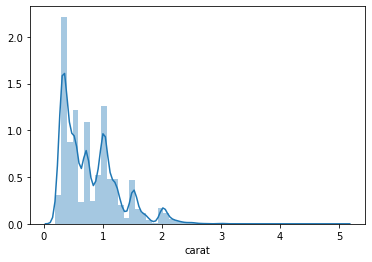

In [49]:
sns.distplot(clean_data['carat'] )

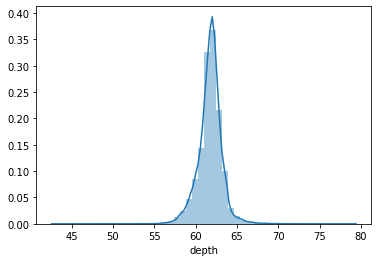

In [52]:
sns.distplot(clean_data['depth'])

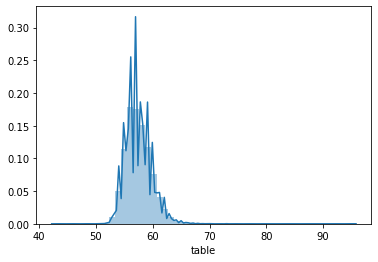

In [54]:
sns.distplot(clean_data['table'])

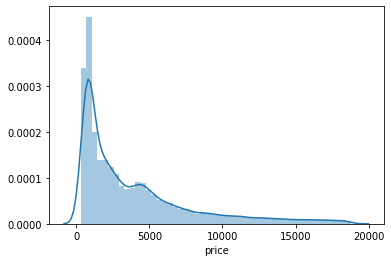

In [56]:
sns.distplot(clean_data['price'])

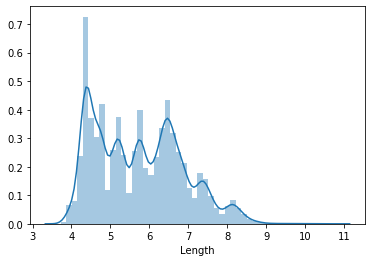

In [64]:
sns.distplot(clean_data['x'], axlabel = 'Length')

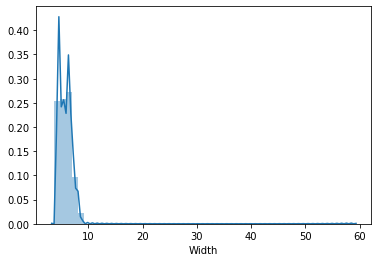

In [67]:
sns.distplot(clean_data['y'], axlabel = 'Width')

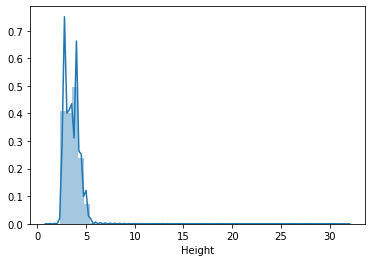

In [69]:
sns.distplot(clean_data['z'], axlabel = 'Height')

#### Now I am going to create the diagonal correlation matrix

In [77]:
matriz_corr = clean_data.corr()

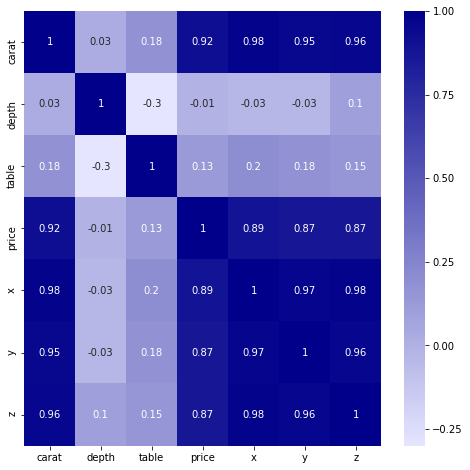

In [79]:
plt.figure(figsize=(8,8))
sns.heatmap(round(matriz_corr, 2), annot=True, fmt=".2g", 
            cmap = sns.light_palette("darkblue", as_cmap=True))

As i can see there are a lot of variables which are highly correletaed with the price, which means sense because
the price of a diamond is usually related how big it is and how it looks like

### Prediction

Since I can not use the string data to predict, I will change then to numeric using the following formula:

In [96]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


clean_data['cut'] = label_cut.fit_transform(clean_data['cut'])
clean_data['color'] = label_color.fit_transform(clean_data['color'])
clean_data['clarity'] = label_clarity.fit_transform(clean_data['clarity'])

C:\Users\PC-Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PC-Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\PC-Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

I need to collect all the R2 scores if I want to be able to predict

In [101]:
# Collect all R2 Scores.
R2_Score = []
models = ['Lasso Regression']

Now I generate the training and the test data in order to do our prediction:

In [97]:
X = clean_data.drop(['price'], axis=1)
y = clean_data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1234)

Now I introduce the lasso in order to predict:

In [102]:
###We formulate the model:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.3f ' % mse)
print('MAE    : %0.3f ' % mae)
print('RMSE   : %0.3f ' % rmse)
print('R2     : %0.3f ' % r2)

R2_Score.append(r2)


###### Lasso Regression ######
Score : 0.8686
[0.87265279 0.86490877 0.86554571 0.87103203 0.86116766]

MSE    : 2076255.978 
MAE    : 899.321 
RMSE   : 1440.922 
R2     : 0.869 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Conclusions

I am able to see that there are an important correlation between the size of the diamond, the color of the diamond, how they are cut and the clarity it has. The model i created with the Lasso regression shows that it is pretty useful to predict having a score of 0.86 

#### Bibliography

* Apuntes de clase de Machine Learning
* Stack Overflow
* Kaggle, dataset : Diamonds